# RNN & LTSM Tesla Stock Prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
1,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
2,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
3,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
4,2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
...,...,...,...,...,...,...,...
248,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22836800
249,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100
250,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000
251,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38167800


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [3]:
train_dates = pd.to_datetime(df['Date'])[:-1]
train_dates

0     2020-10-28
1     2020-10-29
2     2020-10-30
3     2020-11-02
4     2020-11-03
         ...    
247   2021-10-21
248   2021-10-22
249   2021-10-25
250   2021-10-26
251   2021-10-27
Name: Date, Length: 252, dtype: datetime64[ns]

In [4]:
X_data = df.iloc[:-1,1:]
X_data

,Open,High,Low,Close,Adj Close,Volume
0,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
1,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
2,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
3,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
4,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
...,...,...,...,...,...,...
247,856.000000,900.000000,855.500000,894.000000,894.000000,31481500
248,895.500000,910.000000,890.960022,909.679993,909.679993,22836800
249,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100
250,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000


In [5]:
y_data = df[['Close']].shift(-1)[:-1] # Next Day Closing
y_data

,Close
0,410.829987
1,388.040009
2,400.510010
3,423.899994
4,420.980011
...,...
247,909.679993
248,1024.859985
249,1018.429993
250,1037.859985


In [6]:
X_data.iloc[:,1]

0       418.600006
1       418.059998
2       407.589996
3       406.980011
4       427.769989
          ...     
247     900.000000
248     910.000000
249    1045.020020
250    1094.939941
251    1070.880005
Name: High, Length: 252, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler().fit(X_data).transform(X_data)

In [8]:
len(scale_X),len(y_data)

(252, 252)

In [9]:
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator

target_y = y_data.to_numpy().reshape(1,-1)[0]

n_input = 20
n_features = 5
generator = TimeseriesGenerator(scale_X,target_y,length=5, sampling_rate=1,batch_size=1)

In [10]:
len(generator)

247

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(5,6), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mse")
model.fit(generator, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
247/247 [==============================] - 2s 2ms/step - loss: 315990.8750
Epoch 2/5
247/247 [==============================] - 0s 2ms/step - loss: 45974.2227A: 0s - loss: 7921
Epoch 3/5
247/247 [==============================] - 0s 2ms/step - loss: 9814.2734
Epoch 4/5
247/247 [==============================] - 0s 2ms/step - loss: 5379.9272: 0s - los
Epoch 5/5
247/247 [==============================] - 0s 2ms/step - loss: 4606.8638: 0s - los


In [12]:
LSTMyhat = model.predict(generator).ravel()

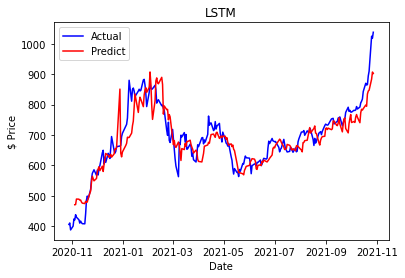

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 64)             18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
import matplotlib.pyplot as plt

plt.plot(train_dates,df['Close'][:-1], color='b',label='Actual')
plt.plot(train_dates[(252-247):],LSTMyhat, color='r',label='Predict')
plt.legend()
plt.title('LSTM')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.show()
model.summary()

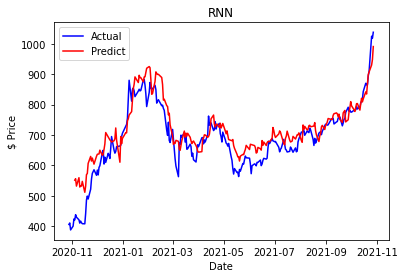

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5, 64)             4544      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.layers import SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(5,6), return_sequences=True))
model2.add(SimpleRNN(32, activation='relu', return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss="mse")
model2.fit(generator, epochs=50, batch_size=1, verbose=0)

yhat = model2.predict(generator).ravel()

plt.plot(train_dates,df['Close'][:-1], color='b',label='Actual')
plt.plot(train_dates[(252-247):],yhat, color='r',label='Predict')
plt.legend()
plt.title('RNN')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.show()
model2.summary()

Surprisingly, the simple Recurrent Neural Network actually performs better than Long Short Term Memory in this exploration project. I believe the reason, is because LTSM tends to overfit the data, causing the model to be overly sensitive. The simple RNN gives a more general solution to this problem, which ultimately gives better performance.